# **Task 1: Exploratory Data Analysis (EDA) and Business Insights**



---



### Importing Libraries

In [1]:
# Import all the required libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




---



### Dataset Loading

In [2]:
# Load the Datasets

transactions = pd.read_csv("/content/drive/MyDrive/ZEOTAP/Transactions.csv")
products = pd.read_csv("/content/drive/MyDrive/ZEOTAP/Products (2).csv")
customers = pd.read_csv("/content/drive/MyDrive/ZEOTAP/Customers.csv")


print("Transactions Dataset:")
print(transactions.head())
print("---------------------------------------------------")
print("\nProducts Dataset:")
print(products.head())
print("---------------------------------------------------")
print("\nCustomers Dataset:")
print(customers.head())


Transactions Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  
---------------------------------------------------

Products Dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Cloth



---



### Data Pre-processing

In [3]:
# Check for missing values
print("Missing Values in Transactions:")
print(transactions.isnull().sum())
print("---------------------------------------------------")
print("\nMissing Values in Products:")
print(products.isnull().sum())
print("---------------------------------------------------")
print("\nMissing Values in Customers:")
print(customers.isnull().sum())


# Convert TransactionDate to datetime
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])


# Drop duplicates
transactions = transactions.drop_duplicates()
products = products.drop_duplicates()
customers = customers.drop_duplicates()


Missing Values in Transactions:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64
---------------------------------------------------

Missing Values in Products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
---------------------------------------------------

Missing Values in Customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


In [4]:
# Merge datasets on common keys
merged_data = transactions.merge(products, on='ProductID').merge(customers, on='CustomerID')


# Display merged data structure
print("\nMerged Dataset:")
print(merged_data.head())



Merged Dataset:
  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  Price_x                      ProductName     Category  Price_y  \
0      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
1      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
2      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
3      601.36   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
4      902.04   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   

      CustomerName         Region  SignupDate  
0   Andrea Jenkins         



---



## **Exploratory Data Analysis**

In [5]:
# Total Revenue
total_revenue = merged_data['TotalValue'].sum()
print(f"\nTotal Revenue: ${total_revenue:,.2f}")
print("---------------------------------------------------")



Total Revenue: $689,995.56
---------------------------------------------------


The Total Revenue generated by the company is 689,995.56 US Dollars.

### 1. Revenue Distribution by Region

In [6]:
# Revenue Distribution by Region
revenue_by_region = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print("\nRevenue by Region:")
print(revenue_by_region)



Revenue by Region:
Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


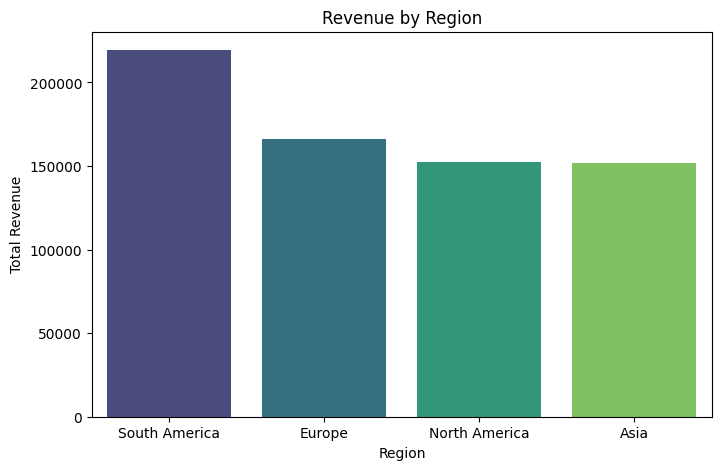

In [7]:
# Revenue Distribution Plot by Region

plt.figure(figsize=(8, 5))
sns.barplot(x=revenue_by_region.index, y=revenue_by_region.values, hue=revenue_by_region.index, palette="viridis", dodge=False, legend=False)
plt.title("Revenue by Region")
plt.xlabel("Region")
plt.ylabel("Total Revenue")
plt.show()


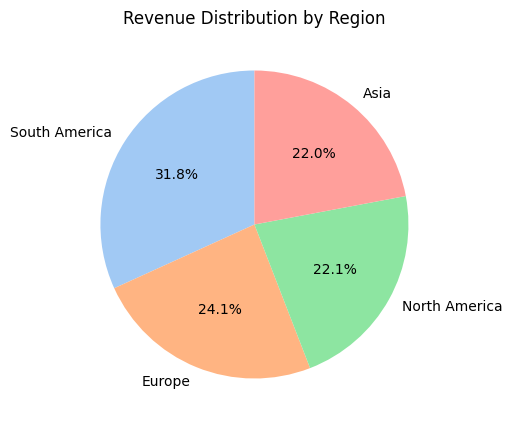

In [8]:
plt.figure(figsize=(5,5))
revenue_by_region.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette("pastel"), startangle=90)
plt.title("Revenue Distribution by Region")
plt.ylabel("")
plt.show()


* South America dominates revenue (31.8%), followed by Europe (24.1%).
* Asia and North America each contribute around 22% of total revenue.
* South America is a key market and significant potential exists in Europe, Asia, and North America.



---



### 2. Revenue Distribution by Product Category

In [9]:
# Revenue Distribution by Category

revenue_by_category = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
print("\nRevenue by Category:")
print(revenue_by_category)



Revenue by Category:
Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


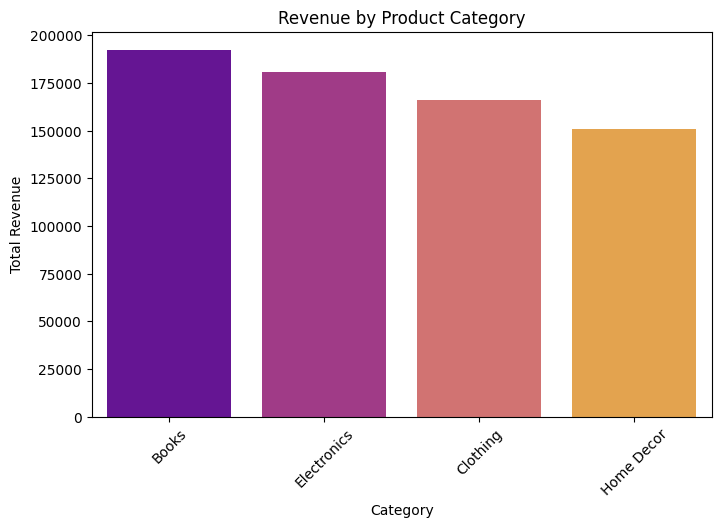

In [10]:
# Revenue Distribution Plot by Category

plt.figure(figsize=(8, 5))
sns.barplot(x=revenue_by_category.index, y=revenue_by_category.values, hue=revenue_by_category.index, palette="plasma", dodge=False, legend=False)
plt.title("Revenue by Product Category")
plt.xlabel("Category")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()


* Books generate the highest revenue, followed by Electronics and Clothing.
* Home Decor has the lowest revenue contribution.



---



### 3. Top 10 Customer by Revenue

In [11]:
# Top 10 Customers by Revenue
top_customers = merged_data.groupby('CustomerName')['TotalValue'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Customers by Revenue:")
print(top_customers)


Top 10 Customers by Revenue:
CustomerName
Paul Parsons            10673.87
Bruce Rhodes             8040.39
Gerald Hines             7663.70
William Adams            7634.45
Aimee Taylor             7572.91
Anna Ball                7111.32
Mrs. Kimberly Wright     7073.28
Jennifer Pena            6819.57
Rodney Eaton             6715.72
Juan Mcdaniel            6708.10
Name: TotalValue, dtype: float64


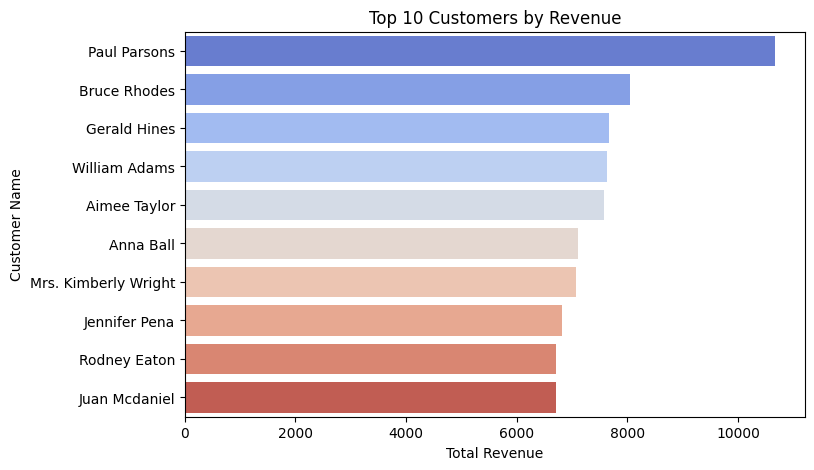

In [12]:
# Top 10 Customers Plot by Revenue
plt.figure(figsize=(8, 5))
sns.barplot(x=top_customers.values, y=top_customers.index, hue=top_customers.index, palette="coolwarm", dodge=False, legend=False)
plt.title("Top 10 Customers by Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("Customer Name")
plt.show()


* Paul Parsons is the highest revenue-generating customer, followed by Bruce Rhodes and Gerald Hines.
* The revenue contribution from the top 10 customers is substantial.
* These top customers are critical to the company's revenue generation, so company should prioritize building strong and long-term relationships with these high-value customers.



---



### 4. Monthly Revenue Trend

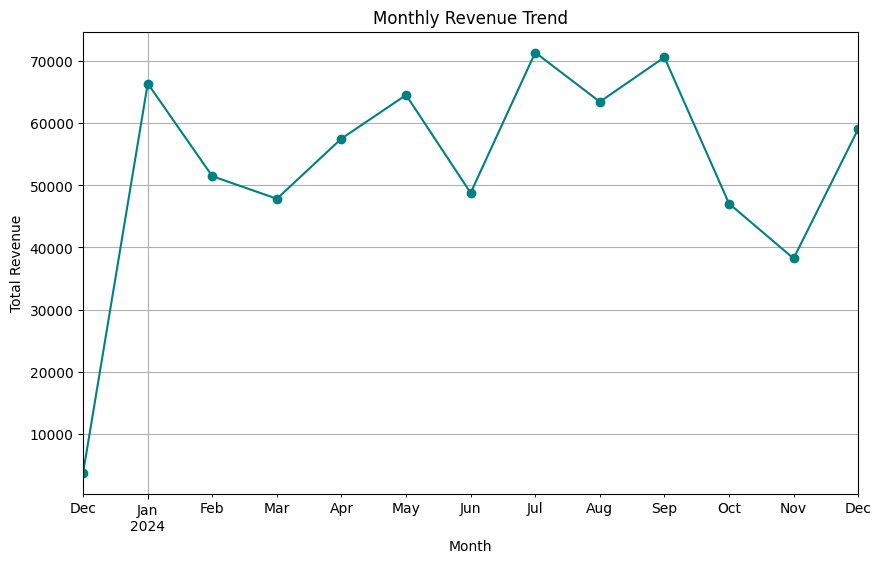

In [13]:
# Monthly Revenue Trend
merged_data['Month'] = merged_data['TransactionDate'].dt.to_period('M')
monthly_revenue = merged_data.groupby('Month')['TotalValue'].sum()

# Plot: Monthly Revenue Trend
plt.figure(figsize=(10, 6))
monthly_revenue.plot(kind='line', marker='o', color='teal')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.grid()
plt.show()


* The sales were at peak in January, july and September, and we should implement some strategies to maximize sales during peak months. This could include targeted promotions, increased inventory, and extended operating hours.
* During the low revenue generation period, we can develop strategies to maintain sales during low-demand periods. This could involve introducing new products, offering discounts, or running cross-selling campaigns.



---



### 5. Top 10 Products by Sales Volume

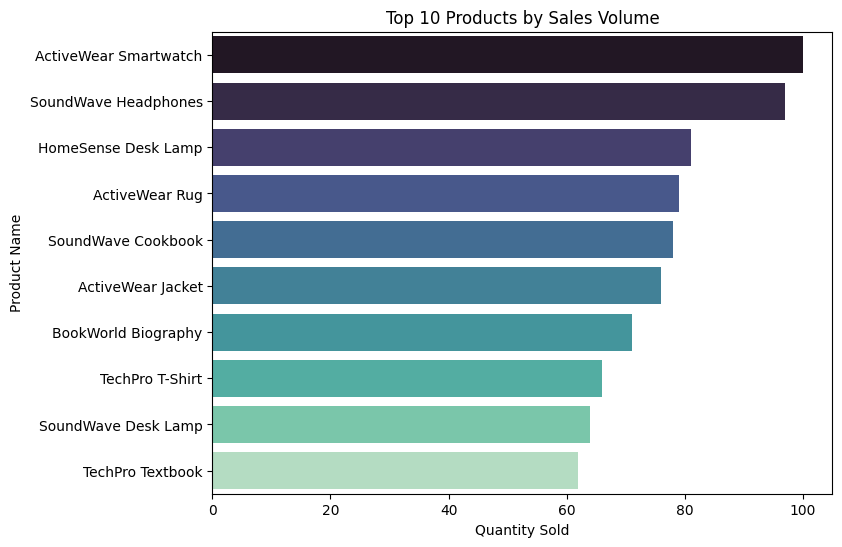

In [14]:
top_products_by_quantity = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 6))
sns.barplot(x=top_products_by_quantity.values, y=top_products_by_quantity.index, hue=top_products_by_quantity.index, palette="mako", dodge=False, legend=False)
plt.title("Top 10 Products by Sales Volume")
plt.xlabel("Quantity Sold")
plt.ylabel("Product Name")
plt.show()


* ActiveWear Smartwatch is the best-selling product, followed by SoundWave Headphones and HomeSense Desk Lamp.
* The chart shows a significant difference in sales volume between the top-selling product and the lower-ranked products.
* We should focus on top-selling products and continue to promote and market the top-selling products to maintain their popularity.



---



### Product Category Performance Across Regions

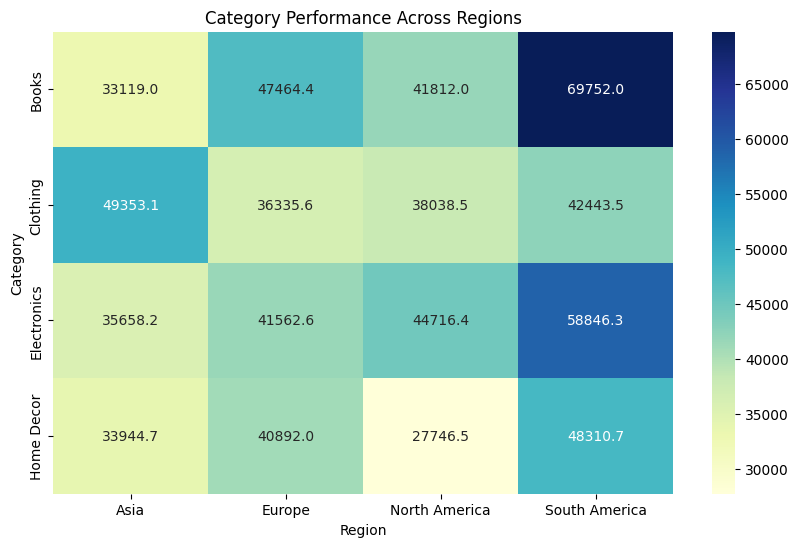

In [15]:
#Category Performance Across Regions

category_region = merged_data.pivot_table(values='TotalValue', index='Category', columns='Region', aggfunc='sum', fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(category_region, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Category Performance Across Regions")
plt.xlabel("Region")
plt.ylabel("Category")
plt.show()


* Books in South America achieved the highest revenue (69,752 USD), followed by strong Clothing sales in Asia (49,353 USD).
* South America leads in revenue generation for most categories, especially Books and Electronics.
* Asia shows a strong preference for Clothing compared to other categories.
* North America has the lowest contribution in Home Decor sales (~27,746 USD).
* Books and Electronics perform consistently well across regions, while Home Decor lags behind other categories.
* The company should focus on improving Home Decor sales in North America through better marketing strategies and targeted promotions.
* The company should also capitalize on South America's strong performance in Books and Electronics by increasing inventory and localized marketing efforts.
* In addition to that, the comapany should also diversify product offerings in Asia by promoting Books and Electronics to complement its strong Clothing sales



---



### Repeatd Customers VS One-Time Buyers

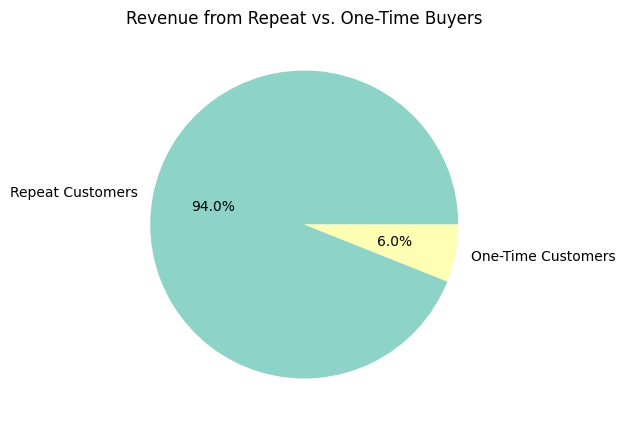

In [16]:

customer_frequency = merged_data.groupby('CustomerID').size()
repeat_customers = customer_frequency[customer_frequency > 1].count()
one_time_customers = customer_frequency[customer_frequency == 1].count()

plt.figure(figsize=(5, 5))
plt.pie([repeat_customers, one_time_customers], labels=['Repeat Customers', 'One-Time Customers'], autopct='%1.1f%%', colors=sns.color_palette("Set3"))
plt.title("Revenue from Repeat vs. One-Time Buyers")
plt.show()


* A high percentage of revenue from repeat customers indicates strong customer loyalty and satisfaction.
* Focus on Retention: The company should prioritize strategies to retain existing customers and encourage repeat purchases.
* The company should implement effective loyalty programs to reward repeat customers and incentivize further purchases.



---

